# II. Programming and critical analysis


Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab.
Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the
assessment of predictive models along this section.

##### Import File

In [4]:
from scipy.io.arff import loadarff
import pandas as pd


# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

In [5]:
# Some of the sklearn facilities require input data to be separated from output data
X = df.drop('class', axis=1)
y = df['class']

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Set random seed for reproducibility
np.random.seed(0)

# Define classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Evaluate models using cross-validation
knn_scores = cross_val_score(knn_classifier, X, y, cv=cv, scoring='accuracy')
nb_scores = cross_val_score(nb_classifier, X, y, cv=cv, scoring='accuracy')

### 1) 
Compare the performance of 𝑘NN with 𝑘 = 5 and naïve Bayes with Gaussian assumption
(consider all remaining parameters for each classifier as sklearn’s default):

##### a) 
 Plot two boxplots with the fold accuracies for each classifier:

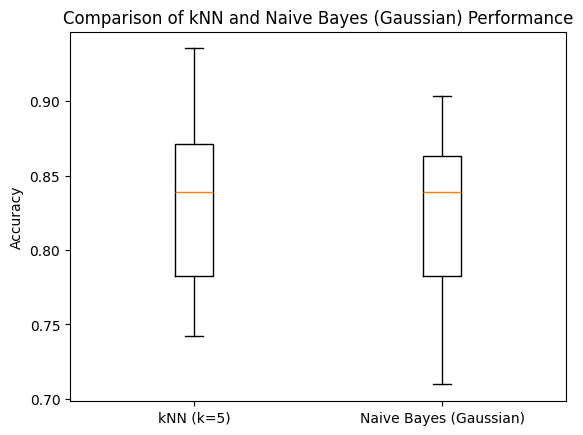

In [7]:
import matplotlib.pyplot as plt

# Plot boxplots
plt.boxplot([knn_scores, nb_scores], labels=['kNN (k=5)', 'Naive Bayes (Gaussian)'])
plt.title('Comparison of kNN and Naive Bayes (Gaussian) Performance')
plt.ylabel('Accuracy')
plt.show()


##### b) 
 Using scipy, test the hyphotesis "kNN is statistically superior to naïve Bayes regarding accuracy", asserting wheter is true.

In [8]:
from scipy import stats

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(knn_scores, nb_scores, alternative = "greater")

# Define significance level
alpha = 0.05

print("p-value = ", p_value) 
# Check if the p-value is less than the significance level
if p_value < alpha:
    print("k-NN is statistically superior to Naive Bayes regarding accuracy (reject the null hypothesis)")
else:
    print("There is no statistically significant difference between k-NN and Naive Bayes regarding accuracy (fail to reject the null hypothesis)")


p-value =  0.19042809062064092
There is no statistically significant difference between k-NN and Naive Bayes regarding accuracy (fail to reject the null hypothesis)


Considering the null hypothesis and its alternate hyphotesis (below), we were able to perform a single-tailed test, using the accuracies obtained in the previous answer.
These are the hyphotesis:

𝐻0 : accuracy𝑘NN = accuracyNaiveBayes

𝐻1 : accuracy𝑘NN > accuracyaive Baye

Using scipy, we were able to obtain a p-value of 0.19042809062064092.
From this value we can conclude that there is no statistically significant difference between kNN and Naïve Bayes regarding accuracy, which means we failed to reject the null hypothesis.s

### 2) 

Consider two 𝑘NN predictors with 𝑘 = 1 and 𝑘 = 5 (uniform weights, Euclidean distance,
all remaining parameters as default). Plot the differences between the two cumulative confusion
matrices of the predictor 
Comment
ent.

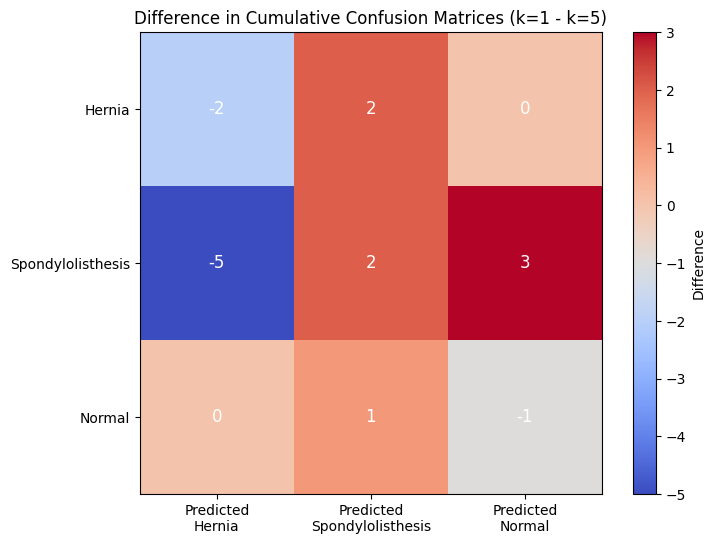

In [10]:
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knn1 = KNeighborsClassifier(weights="uniform", n_neighbors=1, metric="euclidean")
knn5 = KNeighborsClassifier(weights="uniform", n_neighbors=5, metric="euclidean")

cumulative_cm_knn1 = np.zeros((3, 3), dtype=int)
cumulative_cm_knn5 = np.zeros((3, 3), dtype=int)

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and predict with k-NN (k=1)
    knn1.fit(X_train, y_train)
    y_pred_knn1 = knn1.predict(X_test)
    cm_knn1 = confusion_matrix(y_test, y_pred_knn1)
    cumulative_cm_knn1 += cm_knn1

    # Train and predict with k-NN (k=5)
    knn5.fit(X_train, y_train)
    y_pred_knn5 = knn5.predict(X_test)
    cm_knn5 = confusion_matrix(y_test, y_pred_knn5)
    cumulative_cm_knn5 += cm_knn5

cm_difference = cumulative_cm_knn1 - cumulative_cm_knn5
y_class_labels = ["Hernia", "Spondylolisthesis", "Normal"]
x_class_labels = ["Predicted\nHernia", "Predicted\nSpondylolisthesis", "Predicted\nNormal"]

# Plot the differences as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm_difference, cmap='coolwarm', interpolation='nearest')
plt.title('Difference in Cumulative Confusion Matrices (k=1 - k=5)')
#plt.xlabel('Predicted')
#plt.ylabel('True')
# Set x-axis ticks and labels
plt.xticks(np.arange(len(x_class_labels)), x_class_labels)
# Set y-axis ticks and labels
plt.yticks(np.arange(len(y_class_labels)), y_class_labels)

# Display values within the squares
for i in range(len(y_class_labels)):
    for j in range(len(x_class_labels)):
        plt.text(j, i, str(cm_difference[i, j]), ha='center', va='center', color='w', fontsize=12)
        
plt.colorbar(label='Difference')
plt.show()

The heatmap displays the differences in the cumulative confusion matrices between the two k-Nearest Neighbors classifiers (kNN) with different values of k (k=1 and k=5). 
The x-axis represents the predicted class labels, while the y-axis represents the true class labels. The labels are appropriately annotated, making it clear which classes are being referred to. 
The colors in the heatmap represent the differences in the number of observations between the two classifiers for each class. The red (warmer) areas indicate that k=1 had more observations than k=5, whereas the blue (cooler) areas indicate that k=5 had more observations than k=1. The neutral areas (where the value in the square is 0) are the ones in which there were no differences between the number of observations betweeen the two classifiers.
In cases where the predictions were correct (true positives), a positive value indicates that the k=1 classifier is better than the k=5 classifier. This means that k=1 provided more observations for the correct prediction, like it can, for example, be observed for the class "Spondylolisthesis." On the other hand, for classes where the values for true positives are negative, it means that k=5 is a better classifier, since it provided more observations for the correct prediction of said classes (e.g. classes  "Hernia" and "Normal").
When there are false predictions, a positive value suggests that k=1 is worse than k=5 since there are more observations for a wrong prediction with k=1. Conversely, a negative value indicates that k=5 is worse than k=1 because there are more observations for a wrong prediction with k=5.
In summary, the heatmap provides a visual representation of how the two kNN classifiers with different values of k perform in terms of true and false predictions for the different classes we have. It allows for a quick comparison of their performance based on the number of observations for each scenario.

### 3)  
Considering the unique properties of column_diagnosis, identify three possible difficulties 
of naïve Bayes when learning from the given dataset.

Naïve Bayes is an efficient classification algorithm, but this doesn´t mean that it is perfect. Taking the given dataset, it is possible to identify some difficulties of this algorith:
- It assumes that features are conditionally independent given the class label, that is, the algorithm assumes that the presence or absence of one feature does not affect the presence or absence of other features. Our dataset has a very large amount of different variables, which makes it unlikely for all of them to be strictly independet of one another. The violation of this independence assumption can lead to suboptimal model performance.
- The dataset is imbalanced. This happens because there is atleast one class (in this case, "Hernia"), that has significantly less elements that the other two classes. This fact can cause Naïve Bayes to struggle to accurately predict the minority class, due to the unequal class distribution.
- This algorithm usually works well with categorical features, but it can struggle with continuous numeric ones, like we have in our dataset. In order for Naïve Bayes to work, it may be necessary to discretize the continuos numeric features, which can lead to information loss and affect the quality of the model.